In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import scipy.optimize as optimize

In [2]:
# Puntos en el espacio con coordenadas (X,Y,Z)

X = [19, 20, 24]
Y = [10, 40, 28]
Z = [10, 50, 31]

In [3]:
def func(punto, a, b):

    return punto[0]*punto[1]*a + b

In [4]:
guess = (1,1)

params, pcov = optimize.curve_fit(func, (X,Y), Z, guess)
print(params)

[ 0.05952565 -2.64387701]


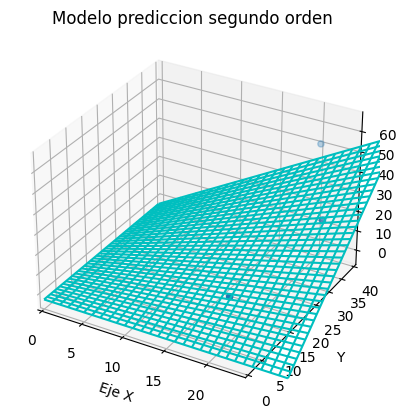

In [5]:
fig=plt.figure(1)
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X,Y,Z)
X = np.arange(0,30,1)
Y = np.arange(0,40,1)
X, Y = np.meshgrid(X, Y)

Z =  func((X,Y),params[0],params[1])
ax.plot_wireframe(X,Y,Z,color='c',)
ax.set_xlabel('Eje X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Modelo prediccion segundo orden ')
plt.axis([0, 24, 0, 40])
plt.show()

## Ejercicio

Ajuste los siguientes datos

In [6]:
# Generar x e y

x = np.linspace(0,1,101)

y = y = 1 + 2*x + 1.5*x*x + 0.3 *x**3 + 1.5* np.random.random(len(x))

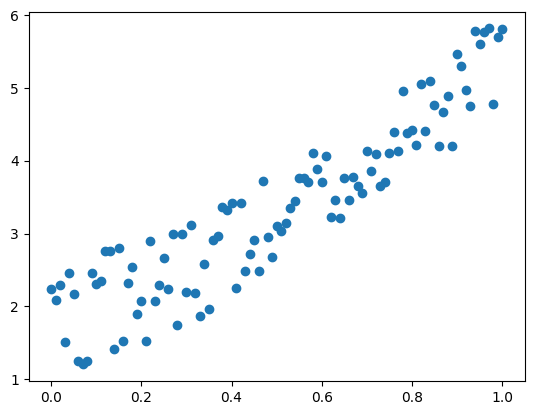

In [7]:
plt.scatter(x,y)
plt.show()

In [8]:
def f(x, a,b,c,d):

    return a+b*x+c*x**2+d*x**3

In [9]:
params, pcov = optimize.curve_fit(f, x, y)

In [10]:
params

array([1.88822567, 1.68325583, 1.17596972, 0.91581263])

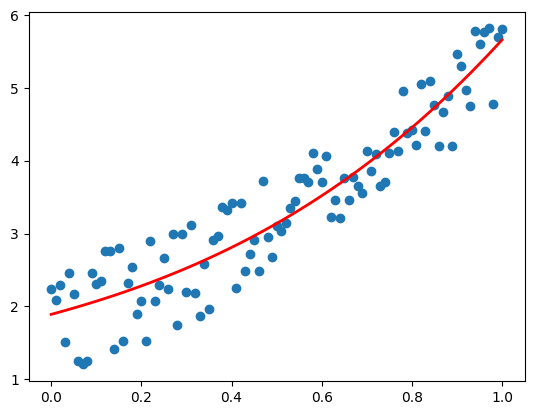

In [11]:
plt.scatter(x,y)
plt.plot(x,f(x,params[0],params[1],params[2],params[3]), lw = 2, color = 'red')
plt.show()

## Ajuste de sistema dinámico 

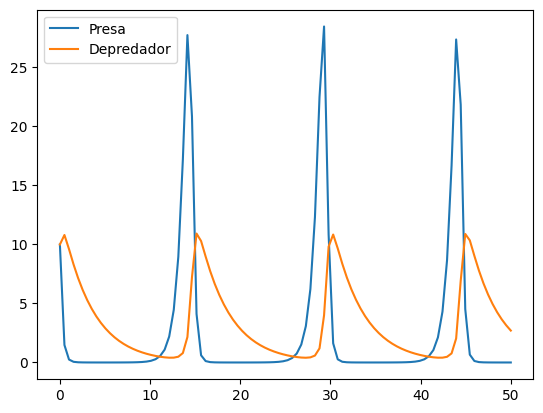

In [12]:
from scipy.integrate import odeint
import numpy as np
from pylab import *  # for plotting commands

# El sistema dinámico

def Model(y,t):

    Pred = y[0]
    Dep = y[1]

    r = 1.6

    d = 0.5

    a = 0.1

    mu = 0.3

    dPred = r*Pred - d*Pred*Dep

    dDep = a*Pred*Dep - mu*Dep

    return [dPred, dDep]

t = np.linspace(0,50,100)

sol = odeint(Model, [10,10],t)

plt.plot(t, sol[:,0], label = 'Presa')
plt.plot(t, sol[:,1], label = 'Depredador')
plt.legend()
plt.show()

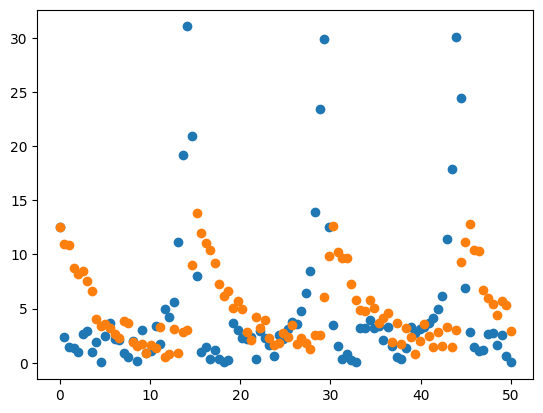

In [13]:
presa = sol[:,0] + 4*np.random.random(len(sol[:,0]))

depredador = sol[:,1] + 3*np.random.random(len(sol[:,1]))

plt.scatter(t, presa)
plt.scatter(t, depredador)
plt.show()



In [14]:
def F(T,r,d,a,mu):

    t = T[:int(len(T)/2)]

    def Model(y,t):

        Pred = y[0]
        Dep = y[1]

        dPred = r*Pred - d*Pred*Dep

        dDep = a*Pred*Dep - mu*Dep

        return [dPred, dDep]
    
    sol = odeint(Model,[10,10],t)

    return np.concatenate([sol[:,0], sol[:,1]],axis = 0)

In [15]:
T = np.concatenate([t,t], axis = 0)
y = np.concatenate([presa, depredador], axis = 0)

params_2d, pcov_2d = optimize.curve_fit(F, T, y)


In [16]:
params_2d

array([1.75260536, 1.37196451, 0.79878644, 0.33592952])

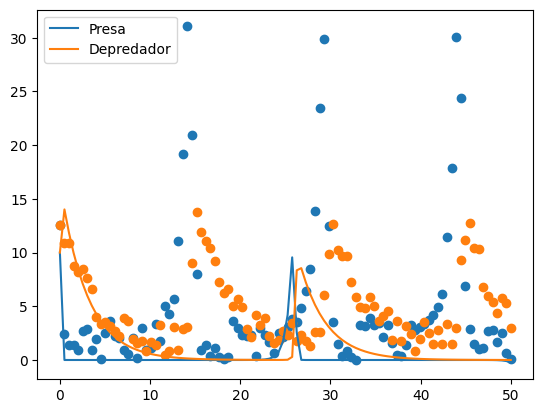

In [17]:
def Model_Fitted(y,t):

    Pred = y[0]
    Dep = y[1]

    r = 1.75260536

    d = 1.37196451

    a = 0.79878644

    mu = 0.33592952

    dPred = r*Pred - d*Pred*Dep

    dDep = a*Pred*Dep - mu*Dep

    return [dPred, dDep]

t = np.linspace(0,50,100)

sol_fit = odeint(Model_Fitted, [10,10],t)

plt.scatter(t, presa)
plt.scatter(t, depredador)
plt.plot(t, sol_fit[:,0], label = 'Presa')
plt.plot(t, sol_fit[:,1], label = 'Depredador')
plt.legend()
plt.show()
